<a href="https://colab.research.google.com/github/Ritesh24f1001677/MACHINE_LEARNING/blob/main/Week2_TA_Sessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

temp = pd.DataFrame({
    'A': [1,2,3,4,np.nan],
    'B': [50,0,250, np.nan, np.nan],
    'C': ['', 'medium', 'low', 'high', 'low'],
    'D': ['Vellore', 'Vellore', 'Trichy', 'Madurai', 'Tiruchirappalli'],
    'E': ['cat', 'dog', None, 'fish', 'egg']
})


In [ ]:
dtf=pd.DataFrame(temp)

In [ ]:
dtf

,A,B,C,D,E
0,1.0,50.0,,Vellore,cat
1,2.0,0.0,medium,Vellore,dog
2,3.0,250.0,low,Trichy,None
3,4.0,NaN,high,Madurai,fish
4,NaN,NaN,low,Tiruchirappalli,egg


In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       5 non-null      object 
 3   D       5 non-null      object 
 4   E       4 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes


In [ ]:
dtf.describe()

,A,B
count,4.000000,3.000000
mean,2.500000,100.000000
std,1.290994,132.287566
min,1.000000,0.000000
25%,1.750000,25.000000
50%,2.500000,50.000000
75%,3.250000,150.000000
max,4.000000,250.000000


In [ ]:
dtf.describe(include=['object','category'])

,C,D,E
count,5,5,4
unique,4,4,4
top,low,Vellore,cat
freq,2,2,1


In [ ]:
dtf.isnull().sum().sum()

np.int64(4)

In [ ]:
new_A=dtf['A'].fillna(dtf['A'].median())

In [ ]:
new_A

,A
0,1.0
1,2.0
2,3.0
3,4.0
4,2.5


# Simple Imputers

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si_A=SimpleImputer(missing_values=np.nan,strategy='median')


In [ ]:
si_A

SimpleImputer(strategy='median')

In [ ]:
si_B=SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
si_B

SimpleImputer()

- fit
- transform
- fit_transform

In [ ]:
si_A.fit(dtf[['A']])

SimpleImputer(strategy='median')

In [ ]:
si_B.fit(dtf[['B']])

SimpleImputer()

In [ ]:
si_A.transform(dtf[['A']])

array([[1. ],
       [2. ],
       [3. ],
       [4. ],
       [2.5]])

In [ ]:
si_B.transform(dtf[['B']])

array([[ 50.],
       [  0.],
       [250.],
       [100.],
       [100.]])

# KNN Imputers

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_A=KNNImputer(n_neighbors=3)

In [ ]:
knn_A.fit_transform(dtf[['B']])

array([[ 50.],
       [  0.],
       [250.],
       [100.],
       [100.]])

Si_C=SimpleImputer(missing_values='',strategy='Most)

In [ ]:
si_C=SimpleImputer(missing_values='',strategy='most_frequent')

In [ ]:
si_C

SimpleImputer(missing_values='', strategy='most_frequent')

In [ ]:
si_C.fit_transform(dtf[['C']])

array([['low'],
       ['medium'],
       ['low'],
       ['high'],
       ['low']], dtype=object)

In [ ]:
dtf['C'].unique()

array(['', 'medium', 'low', 'high'], dtype=object)

In [ ]:
si_E=SimpleImputer(missing_values=None, strategy='most_frequent')
si_E.fit_transform(dtf[['E']])

array([['cat'],
       ['dog'],
       ['cat'],
       ['fish'],
       ['egg']], dtype=object)

# Encoders

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [ ]:
ord=OrdinalEncoder()

In [ ]:
ohe=OneHotEncoder(sparse_output=False)

In [ ]:
ohe.fit_transform(dtf[['D']])

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
ohe.transform(dtf[['D']])

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
ohe.get_feature_names_out()

array(['D_Madurai', 'D_Tiruchirappalli', 'D_Trichy', 'D_Vellore'],
      dtype=object)

# Ordinal Encoder

In [ ]:
oe=OrdinalEncoder(categories=[['low','medium','high']])

# Scalling

In [ ]:
dtf['A']=dtf['A'].fillna(dtf['A'].median())
dtf['B']=dtf['B'].fillna(dtf['B'].median())

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [ ]:
ss=StandardScaler()

In [ ]:
mas=MaxAbsScaler()

In [ ]:
mms=MinMaxScaler()

In [ ]:
mas.fit_transform(dtf[['A','B']])

array([[0.25 , 0.2  ],
       [0.5  , 0.   ],
       [0.75 , 1.   ],
       [1.   , 0.2  ],
       [0.625, 0.2  ]])

In [ ]:
mms.fit_transform(dtf[['A','B']])

array([[0.        , 0.2       ],
       [0.33333333, 0.        ],
       [0.66666667, 1.        ],
       [1.        , 0.2       ],
       [0.5       , 0.2       ]])

In [ ]:
ss.fit_transform(dtf[['A','B']])

array([[-1.5       , -0.3441236 ],
       [-0.5       , -0.91766294],
       [ 0.5       ,  1.95003374],
       [ 1.5       , -0.3441236 ],
       [ 0.        , -0.3441236 ]])

In [ ]:
d1=pd.read_csv('/content/data (2).csv')

In [ ]:
d1

,customer_id,name,age,gender,email,join_date,last_purchase,total_spent,purchase_count,country,city,postal_code,subscription_type,credit_score,is_active,payment_method,preferred_category,avg_session_duration,device_type,campaign_response
0,4d623250-b704-4df8-aea2-5403458a1d6e,Sean Nelson,41,F,tylersmith@example.org,"Dec 19, 2020",2025-04-02,238.517142,51.0,Germany,Port Michaelmouth,06803,Corporate,663,True,NaN,Groceries,1066.626690,TABLET,NaN
1,e5593c2b-1ed8-4fe8-be82-acced82f9711,Eddie Wood,38,Female,xreed@example.net,30/10/2021,2024-12-25,93.126377,31.0,USA,Brig...,64245,NaN,656,N,PayPal,Clothing,327.762945,mobile,no
2,7240c499-1c3d-4188-8b12-76c515aff931,Abigail Graham,11,M,cartersara@example.com,"May 03, 2022",2025-05-10,873.017713,87.0,Germany,Port Kevinton,43574,Trial,672,N,Cryptocurrency,Clothing,95.654242,Mobile,No
3,43c7001d-4c6d-4011-aa02-e9b57c0e3944,Jessica Contreras,40,NaN,fsalazar@example.org,"Aug 03, 2021",NaN,401.703726,NaN,India,Gillespietown,NaN,Trial,614,True,PayPal,Home,498.371991,mobile,NaN
4,4fb0f886-7e67-4982-bfe0-959272cece1b,Kelly Olson,20,Female,robert21@example.org,"Apr 05, 2024",2025-05-07,1198.186419,34.0,Germany,jamesberg,82358,Premium,692,N,Bank Transfer,Groceries,NaN,mobile,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,f7a93a70-6713-4200-84a0-8e6845ecbd57,Cody Brown,40,F,vsullivan@example.net,2020-07-14,2024-09-01,615.638525,98.0,UK,ANTHONYMOUTH,15589,Corporate,728,True,Cryptocurrency,Groceries,163.618573,desktop,YES
9996,daf9abc9-1ff9-4edb-8a20-da6ae77ea13e,Dana Fields,48,Female,amy07@example.com,2022-10-24,2025-01-27,1134.668932,97.0,NaN,WEST JODY,86614,Trial,738,True,Cash,Groceries,516.570941,desktop,NaN
9997,6c7ddfb3-459d-41f9-bd1c-9a2acb0c7eee,Christine Humphrey,35,Female,sharpsean@example.net,07/01/2024,2024-12-07,1339.414613,6.0,USA,SOUTH ELIZABETHBOROUGH,33931,Trial,850,No,NaN,Groceries,NaN,mobile,No
9998,1729037e-0a06-47a6-91c6-52a0ece6506b,Pamela Rodriguez,59,NaN,fgordon@example.com,"Sep 01, 2024",2025-03-13,676.673223,89.0,Japan,East Erikville,70357,Premium,659,N,Bank Transfer,Electronics,NaN,TABLET,YES


In [ ]:
d1.shape

(10000, 20)

In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           10000 non-null  object 
 1   name                  9041 non-null   object 
 2   age                   10000 non-null  int64  
 3   gender                8620 non-null   object 
 4   email                 10000 non-null  object 
 5   join_date             10000 non-null  object 
 6   last_purchase         8470 non-null   object 
 7   total_spent           10000 non-null  float64
 8   purchase_count        9059 non-null   float64
 9   country               8433 non-null   object 
 10  city                  10000 non-null  object 
 11  postal_code           7523 non-null   object 
 12  subscription_type     7963 non-null   object 
 13  credit_score          10000 non-null  int64  
 14  is_active             10000 non-null  object 
 15  payment_method      

In [ ]:
d1.isnull().sum()

,0
customer_id,0
name,959
age,0
gender,1380
email,0
join_date,0
last_purchase,1530
total_spent,0
purchase_count,941
country,1567


In [ ]:
d1.duplicated().sum()

np.int64(0)

In [ ]:
d1.head()

,customer_id,name,age,gender,email,join_date,last_purchase,total_spent,purchase_count,country,city,postal_code,subscription_type,credit_score,is_active,payment_method,preferred_category,avg_session_duration,device_type,campaign_response
0,4d623250-b704-4df8-aea2-5403458a1d6e,Sean Nelson,41,F,tylersmith@example.org,"Dec 19, 2020",2025-04-02,238.517142,51.0,Germany,Port Michaelmouth,06803,Corporate,663,True,NaN,Groceries,1066.626690,TABLET,NaN
1,e5593c2b-1ed8-4fe8-be82-acced82f9711,Eddie Wood,38,Female,xreed@example.net,30/10/2021,2024-12-25,93.126377,31.0,USA,Brig...,64245,NaN,656,N,PayPal,Clothing,327.762945,mobile,no
2,7240c499-1c3d-4188-8b12-76c515aff931,Abigail Graham,11,M,cartersara@example.com,"May 03, 2022",2025-05-10,873.017713,87.0,Germany,Port Kevinton,43574,Trial,672,N,Cryptocurrency,Clothing,95.654242,Mobile,No
3,43c7001d-4c6d-4011-aa02-e9b57c0e3944,Jessica Contreras,40,NaN,fsalazar@example.org,"Aug 03, 2021",NaN,401.703726,NaN,India,Gillespietown,NaN,Trial,614,True,PayPal,Home,498.371991,mobile,NaN
4,4fb0f886-7e67-4982-bfe0-959272cece1b,Kelly Olson,20,Female,robert21@example.org,"Apr 05, 2024",2025-05-07,1198.186419,34.0,Germany,jamesberg,82358,Premium,692,N,Bank Transfer,Groceries,NaN,mobile,YES


In [ ]:
d1['postal_code'].unique()

array(['06803', '64245', '43574', ..., '86614', '33931', '70357'],
      dtype=object)

In [ ]:
si_postal = SimpleImputer(strategy='most_frequent')
si_campaign = SimpleImputer(strategy='constant', fill_value='missing_response')
si_age = SimpleImputer(strategy='median')

In [ ]:
si_postal.fit_transform(d1[['postal_code']])

array([['06803'],
       ['64245'],
       ['43574'],
       ...,
       ['33931'],
       ['70357'],
       ['AB-123']], dtype=object)

In [ ]:
si_campaign.fit_transform(d1[['campaign_response']])

array([['missing_response'],
       ['no'],
       ['No'],
       ...,
       ['No'],
       ['YES'],
       ['No']], dtype=object)

In [ ]:
si_age.fit_transform(d1[['age']])

array([[41.],
       [38.],
       [11.],
       ...,
       [35.],
       [59.],
       [40.]])

In [ ]:
import pandas as pd
import numpy as np
data={
    'Age':[25,30,None,45,40],
    'Fare':[100,None, 80, 75,60]
}

In [ ]:
data

{'Age': [25, 30, None, 45, 40], 'Fare': [100, None, 80, 75, 60]}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df


,Age,Fare
0,25.0,100.0
1,30.0,NaN
2,NaN,80.0
3,45.0,75.0
4,40.0,60.0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='mean')
si

SimpleImputer()

In [ ]:
si.fit_transform(df)

array([[ 25.  , 100.  ],
       [ 30.  ,  78.75],
       [ 35.  ,  80.  ],
       [ 45.  ,  75.  ],
       [ 40.  ,  60.  ]])

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
ki=KNNImputer(n_neighbors=2 ,missing_values=np.nan)

In [ ]:
ki.fit_transform(df)

array([[ 25. , 100. ],
       [ 30. ,  80. ],
       [ 42.5,  80. ],
       [ 45. ,  75. ],
       [ 40. ,  60. ]])

In [ ]:
data1=[{'city':'New York', 'temperature':21},
      {'city':'San Francisco', 'temperature':18},
      {'city':'Chicago','temperature':15}]


In [ ]:
df1=pd.DataFrame(data1)

In [ ]:
df1

,city,temperature
0,New York,21
1,San Francisco,18
2,Chicago,15


In [ ]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
vct=DictVectorizer(sparse=False)

In [ ]:
vct

DictVectorizer(sparse=False)

In [ ]:
vct.fit_transform(data1)

array([[ 0.,  1.,  0., 21.],
       [ 0.,  0.,  1., 18.],
       [ 1.,  0.,  0., 15.]])

In [ ]:
fh=FeatureHasher(n_features=3, input_type='dict')

In [ ]:
fh

FeatureHasher(n_features=3)

In [ ]:
fh.fit_transform(data1).toarray()

array([[  0., -21.,  -1.],
       [  0., -18.,  -1.],
       [  1., -15.,   0.]])

In [ ]:
from sklearn import datasets
titan=datasets.fetch_openml(name='titanic',version=1)

In [ ]:
titan

{'data':       pclass                                             name     sex  \
 0          1                    Allen, Miss. Elisabeth Walton  female   
 1          1                   Allison, Master. Hudson Trevor    male   
 2          1                     Allison, Miss. Helen Loraine  female   
 3          1             Allison, Mr. Hudson Joshua Creighton    male   
 4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
 ...      ...                                              ...     ...   
 1304       3                             Zabour, Miss. Hileni  female   
 1305       3                            Zabour, Miss. Thamine  female   
 1306       3                        Zakarian, Mr. Mapriededer    male   
 1307       3                              Zakarian, Mr. Ortin    male   
 1308       3                               Zimmerman, Mr. Leo    male   
 
           age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
 0     29.0000      0 

In [ ]:
titan.DESCR

'**Author**: Frank E. Harrell Jr., Thomas Cason  \n**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  \n**Please cite**:   \n\nThe original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.\n\nThomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new v

In [ ]:
df3=pd.DataFrame(titan.data, columns=titan.feature_names)

In [ ]:
df3.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df3.shape

(1309, 13)

In [ ]:
df3.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp=SimpleImputer(strategy='mean',missing_values=np.nan)

In [ ]:
imp

SimpleImputer()

In [ ]:
df3['age']=imp.fit_transform(df3[['age']])

In [ ]:
df3['age'].isnull().sum()

np.int64(0)

In [ ]:
to_be_fill=['age','fare']

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
kn=KNNImputer(n_neighbors=5,missing_values=np.nan)


In [ ]:
kn

KNNImputer()

In [ ]:
kn.fit_transform(df3[to_be_fill])

array([[ 29.    , 211.3375],
       [  0.9167, 151.55  ],
       [  2.    , 151.55  ],
       ...,
       [ 26.5   ,   7.225 ],
       [ 27.    ,   7.225 ],
       [ 29.    ,   7.875 ]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder=LabelEncoder()

In [ ]:
labelencoder

LabelEncoder()

In [ ]:
labelencoder.fit_transform(df3['sex'])

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
ohe=OneHotEncoder()

In [ ]:
ohe

OneHotEncoder()

In [ ]:
cols=['sex','embarked']
ohe.fit_transform(df3[cols]).toarray()

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [ ]:
df3['embarked']

,embarked
0,S
1,S
2,S
3,S
4,S
...,...
1304,C
1305,C
1306,C
1307,C


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
Ord=OrdinalEncoder()

In [ ]:
Ord.fit_transform(df3[['embarked']])

array([[2.],
       [2.],
       [2.],
       ...,
       [0.],
       [0.],
       [2.]])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

In [ ]:
sii=SimpleImputer(strategy='most_frequent', fill_value=np.nan)

In [ ]:
df3['fare']=sii.fit_transform(df3[['fare']])


In [ ]:
df3['fare'].isnull().sum()

np.int64(0)

In [ ]:
select_2_best=SelectKBest(k=2)
select_2_best

SelectKBest(k=2)

In [ ]:
temp=pd.DataFrame({
    'A':[1,2,3,4,np.nan],
    'B':[50,0,250,np.nan,np.nan],
    'C':['','medium','low','high','low'],
    'D':['Vellore','Chennai','trichy','Madhurai','tiruxhurappali'],
    'E':['cat','dog',None,'fish','egg']

})

In [ ]:
temp

,A,B,C,D,E
0,1.0,50.0,,Vellore,cat
1,2.0,0.0,medium,Chennai,dog
2,3.0,250.0,low,trichy,None
3,4.0,NaN,high,Madhurai,fish
4,NaN,NaN,low,tiruxhurappali,egg


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       5 non-null      object 
 3   D       5 non-null      object 
 4   E       4 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes


In [ ]:
temp.describe()

,A,B
count,4.000000,3.000000
mean,2.500000,100.000000
std,1.290994,132.287566
min,1.000000,0.000000
25%,1.750000,25.000000
50%,2.500000,50.000000
75%,3.250000,150.000000
max,4.000000,250.000000


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='mean',missing_values=np.nan)

In [ ]:
si

SimpleImputer()

In [ ]:
temp[['A','B']]=si.fit_transform(temp[['A','B']])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder(categories=[['low','medium','high','']])

In [ ]:
oe

OrdinalEncoder(categories=[['low', 'medium', 'high', '']])

In [ ]:
temp['C']=oe.fit_transform(temp[['C']])

In [ ]:
from sklearn.preprocessing  import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(sparse_output=False)

In [ ]:
ohe

OneHotEncoder(sparse_output=False)

In [ ]:
temp['D']=ohe.fit_transform(temp[['D']])

In [ ]:
ohe.get_feature_names_out()

array(['D_Chennai', 'D_Madhurai', 'D_Vellore', 'D_tiruxhurappali',
       'D_trichy'], dtype=object)

In [ ]:
temp

,A,B,C,D,E
0,1.0,50.0,3.0,0.0,cat
1,2.0,0.0,1.0,1.0,dog
2,3.0,250.0,0.0,0.0,None
3,4.0,100.0,2.0,0.0,fish
4,2.5,100.0,0.0,0.0,egg


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
ss.fit_transform(temp[['A','B']])

array([[-1.5       , -0.5976143 ],
       [-0.5       , -1.19522861],
       [ 0.5       ,  1.79284291],
       [ 1.5       ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline(steps=[
    ('imputer',si),
    ('scaler',ss)
])

In [ ]:
pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
pipe.fit_transform(temp[['A','B']])

array([[-1.5       , -0.5976143 ],
       [-0.5       , -1.19522861],
       [ 0.5       ,  1.79284291],
       [ 1.5       ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
temp.shape

(5, 5)

In [ ]:
temp.duplicated().sum()

np.int64(0)

In [ ]:
df3['sex'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [ ]:
map={
    'female':'F',
    'male':'M'
}


In [ ]:
df3['sex']=df3['sex'].replace(map)

In [ ]:
df3

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",F,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",M,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",F,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",M,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",F,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",M,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",M,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df3['sex'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [ ]:
df3['embarked'].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
map={
    'C':2,
    'Q':3,
    'S':4
}

In [ ]:
df3['embarked']=df3['embarked'].replace(map)

/tmp/ipython-input-2240164612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['embarked']=df3['embarked'].replace(map)
/tmp/ipython-input-2240164612.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df3['embarked']=df3['embarked'].replace(map)


In [ ]:
df3

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",F,29.000000,0,0,24160,211.3375,B5,4,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",M,0.916700,1,2,113781,151.5500,C22 C26,4,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",F,2.000000,1,2,113781,151.5500,C22 C26,4,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",M,30.000000,1,2,113781,151.5500,C22 C26,4,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.000000,1,2,113781,151.5500,C22 C26,4,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,14.500000,1,0,2665,14.4542,NaN,2,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",F,29.881135,1,0,2665,14.4542,NaN,2,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",M,26.500000,0,0,2656,7.2250,NaN,2,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",M,27.000000,0,0,2670,7.2250,NaN,2,NaN,NaN,NaN


In [ ]:
# Abstracting the Days and Month from the join date and ;ast purchase

In [ ]:
product=pd.read_csv('/content/products_dataset.csv')

In [ ]:
product

,Product_Name,Category,Price,Quantity
0,Shoes,Clothing,13117.0,2.0
1,Novel,Books,48083.0,53.0
2,Milk,Food,23649.0,44.0
3,Toy Car,NaN,35272.0,90.0
4,Shoes,Clothing,11887.0,32.0
...,...,...,...,...
95,Pencil,Toys,904.0,33.0
96,NaN,Electronics,24598.0,14.0
97,Shoes,NaN,38673.0,21.0
98,Headphones,NaN,7442.0,48.0


In [ ]:
#use datetime
'''df['join date'=pd.to_datetime(df['join_date'],format='mixed')

to extract the date= .dt.day
to extract the month= .dt.month

'''

"df['join date'=pd.to_datetime(df['join_date'],format='mixed')\n\nto extract the date= .dt.day\nto extract the month= .dt.month\n\n"

(array([ 8., 11.,  6., 12.,  6.,  8.,  7.,  7.,  9., 13.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

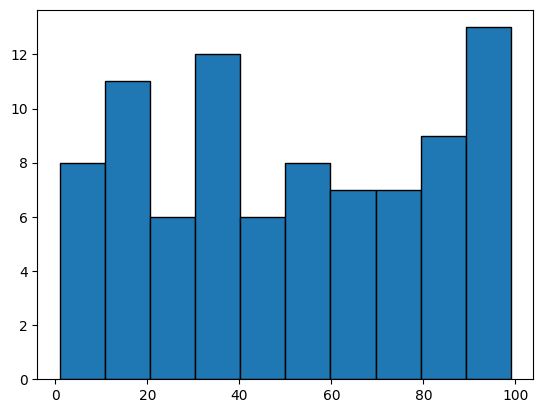

In [ ]:
import matplotlib.pyplot as plt
plt.hist(product['Quantity'],edgecolor='black')